__**Coursework 5 - Global Earthquake Data Visualisation**__

In this weeks coursework and for the final weekly submission I have chosen to carry out a variety of different tasks and visualisations using the National Earthquake Information Center (NEIC) Significant Earthquakes dataset (1965-2016). The detailed analysis of which can be shown below with the script and relevant plots.

__**Intended Analysis**__

- Locations of earthquakes (global scale & country scale).
- Frequency of earthquakes over time.
- Size/Magnitude of earthquakes.
- Possible causes of earthquakes.
- Locations of the highest risk (most prone to damage).
- Possibility to identify areas of future earthquakes.

__**Sections:**__
- Part 1 Visualisation - Locations and Size/Magnitude of Earthquakes
- Part 2 Visualisation - Frequency of Eathquakes over time 
- Part 3 Visualisation - Locations of highest risk from Earthquakes 
- Part 4 - Future Developments (Causes etc.)

__**Initial Conditions/Setting Up Of The Dataset**__

In [1]:
# Imports data analysis libraries, (numpy for numerical computations and pandas to read the dataset/.csv files)

import numpy as np 
import pandas as pd

In [2]:
# Imports visualisation libraries, (matplot.lib and seaborn for graphical and statistical analysis )

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
from mpl_toolkits.basemap import Basemap
%config InlineBackend.figure_format = 'retina'

In [3]:
# Allows warnings to be ignored 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Imports the data for global temperatures by country 

earthquakedata = pd.read_csv("earthquakedatabase.csv")

In [5]:
# Shows the whole dataset

earthquakedata

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [6]:
# Gives a list of all the different column headings/variables within the dataset
earthquakedata.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [7]:
# Shows an example of 5 rows within the whole dataset

earthquakedata.sample(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
14468,08/11/1999,04:27:55,34.791,32.939,Earthquake,33.0,NaN,NaN,5.6,MWC,...,NaN,NaN,NaN,NaN,1.17,USP0009CW8,US,US,HRV,Reviewed
7213,10/05/1984,19:09:17,-6.327,148.979,Earthquake,56.8,1.7,NaN,5.5,MW,...,NaN,NaN,NaN,NaN,1.00,USP00027Y5,US,US,HRV,Reviewed
16961,10/09/2004,15:44:24,-15.186,-173.284,Earthquake,10.0,0.0,189.0,5.9,MWB,...,NaN,70.2,NaN,NaN,1.00,USP000D62V,US,US,US,Reviewed
16345,07/21/2003,19:21:11,6.678,93.601,Earthquake,10.0,NaN,260.0,5.6,MWC,...,NaN,56.3,NaN,NaN,1.04,USP000C317,US,US,HRV,Reviewed
11848,04/02/1994,15:34:48,-15.318,-177.495,Earthquake,394.9,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.00,USP0006AHY,US,US,HRV,Reviewed


In [8]:
# Shows the input types/features within the dataset (Examples object(String) and float(numerical values))

earthquakedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [9]:
# Shows a summary/additional information for the dataset 

earthquakedata.describe(include="all")

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
count,23412,23412,23412.000000,23412.000000,23412,23412.000000,4461.000000,7097.000000,23412.000000,23409,...,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,23412,23412,23412,23412,23412
unique,12401,20472,NaN,NaN,4,NaN,NaN,NaN,NaN,10,...,NaN,NaN,NaN,NaN,NaN,23412,13,48,24,2
top,03/11/2011,02:56:58,NaN,NaN,Earthquake,NaN,NaN,NaN,NaN,MW,...,NaN,NaN,NaN,NaN,NaN,USP0005K8D,US,US,US,Reviewed
freq,128,5,NaN,NaN,23232,NaN,NaN,NaN,NaN,7722,...,NaN,NaN,NaN,NaN,NaN,1,20630,20350,10458,20773
mean,NaN,NaN,1.679033,39.639961,NaN,70.767911,4.993115,275.364098,5.882531,NaN,...,48.944618,44.163532,3.992660,7.662759,1.022784,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,30.113183,125.511959,NaN,122.651898,4.875184,162.141631,0.423066,NaN,...,62.943106,32.141486,5.377262,10.430396,0.188545,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-77.080000,-179.997000,NaN,-1.100000,0.000000,0.000000,5.500000,NaN,...,0.000000,0.000000,0.004505,0.085000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,-18.653000,-76.349750,NaN,14.522500,1.800000,146.000000,5.600000,NaN,...,10.000000,24.100000,0.968750,5.300000,0.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,-3.568500,103.982000,NaN,33.000000,3.500000,255.000000,5.700000,NaN,...,28.000000,36.000000,2.319500,6.700000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,26.190750,145.026250,NaN,54.000000,6.300000,384.000000,6.000000,NaN,...,66.000000,54.000000,4.724500,8.100000,1.130000,NaN,NaN,NaN,NaN,NaN


__**Initial Obsevations from the dataset:**__
- On first analysis we can see that the dataset contains some columns which are not filled, to give a detailed number of the amounts of gaps within each column we will perform a summation of the null/empty cells as below:

In [10]:
# Checks for any unusable values within the dataset (Useful when trying to formulate graphical results)

nullcolumns = earthquakedata.columns[earthquakedata.isnull().any()] # Renames the variables/null columns within the dataset 

earthquakedata.isnull().sum() # Shows the amount of missing and unusable values within the dataset

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

Although there are some missing fields within the columns there is no need to attempt to fill these gaps at this stage, as it will still provide an accurate representation of the magnitude of earthquakes in respect to location; if further analysis was to be made using the dataset in relation to some of the variables with null values then we would attempt to fill these gaps however at this stage we feel they will be useless in providing addition information to the dataset.

__**Initial Visualisation Of Data**__

The examples of graphs/plots as shown below give evidence to some of the initial hypothesis/intentions for this dataset. As well as this, it shows the breakdown of variables and background information.

In [11]:
# Returns all of the different magnitudes of earthquakes within the dataset 

earthquakedata.Magnitude.unique()

array([ 6.  ,  5.8 ,  6.2 ,  6.7 ,  5.9 ,  8.2 ,  5.5 ,  5.6 ,  6.1 ,
        8.7 ,  5.7 ,  7.3 ,  6.5 ,  6.4 ,  6.3 ,  7.  ,  7.4 ,  7.6 ,
        6.8 ,  7.7 ,  7.2 ,  7.8 ,  6.9 ,  6.6 ,  7.5 ,  7.1 ,  6.35,
        8.1 ,  5.62,  5.63,  7.9 ,  5.52,  5.82,  5.54,  8.  ,  5.64,
        5.55,  5.67,  5.84,  5.81,  6.47,  6.31,  5.75,  5.66,  5.51,
        6.45,  6.57,  5.77,  5.53,  5.69,  5.89,  5.58,  8.3 ,  5.94,
        8.4 ,  6.48,  5.97,  9.1 ,  8.6 ,  5.88,  8.8 ,  5.72,  6.02,  5.73])

In [12]:
# Returns the max, min and average magnitudes of the earthquakes within the dataset 

minmag = earthquakedata.Magnitude.min()
maxmag = earthquakedata.Magnitude.max()
avemag = earthquakedata.Magnitude.mean()

print("Minimum Magnitude:", minmag)
print("Maximum Magnitude:", maxmag)
print("Mean/Average Magnitude:", avemag)

Minimum Magnitude: 5.5
Maximum Magnitude: 9.1
Mean/Average Magnitude: 5.882530753460003


This shows the ranges of magnitudes recorded within the dataset as well as the maximum and minimum magnitudes which are 9.1 and 5.5 respectively. In addition to this it also shows that the mean/average magnitude of earthquakes globally are 5.88. However this can also be visualised graphically as represented below:

Magnitude   Number of Occurrences
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


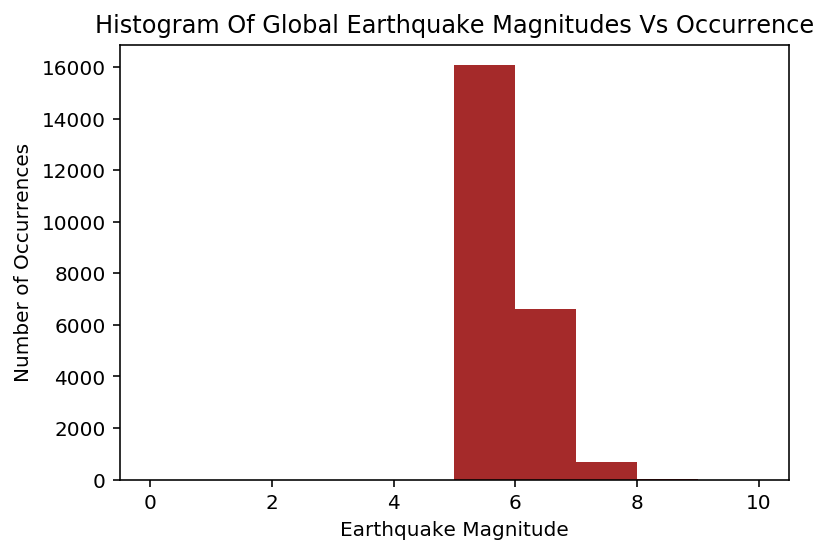

In [13]:
# This puts the data for magnitude into set groups/bins and then plots these in a histogram

(n,bins,patches) = plt.hist(earthquakedata["Magnitude"], range=(0,10), bins=10, color='brown')
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Number of Occurrences")
plt.title("Histogram Of Global Earthquake Magnitudes Vs Occurrence")

# Prints the number of occurances within each range of magnitudes of the earthquakes (It was chosen to show from a magnitude of 5 and above as the min magnitude was 5.5)

print("Magnitude" +"   "+ "Number of Occurrences")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

In addition to this it is useful to do a quick visual to see the general trend in earthquake occurance per year, as shown by the bar plot below:

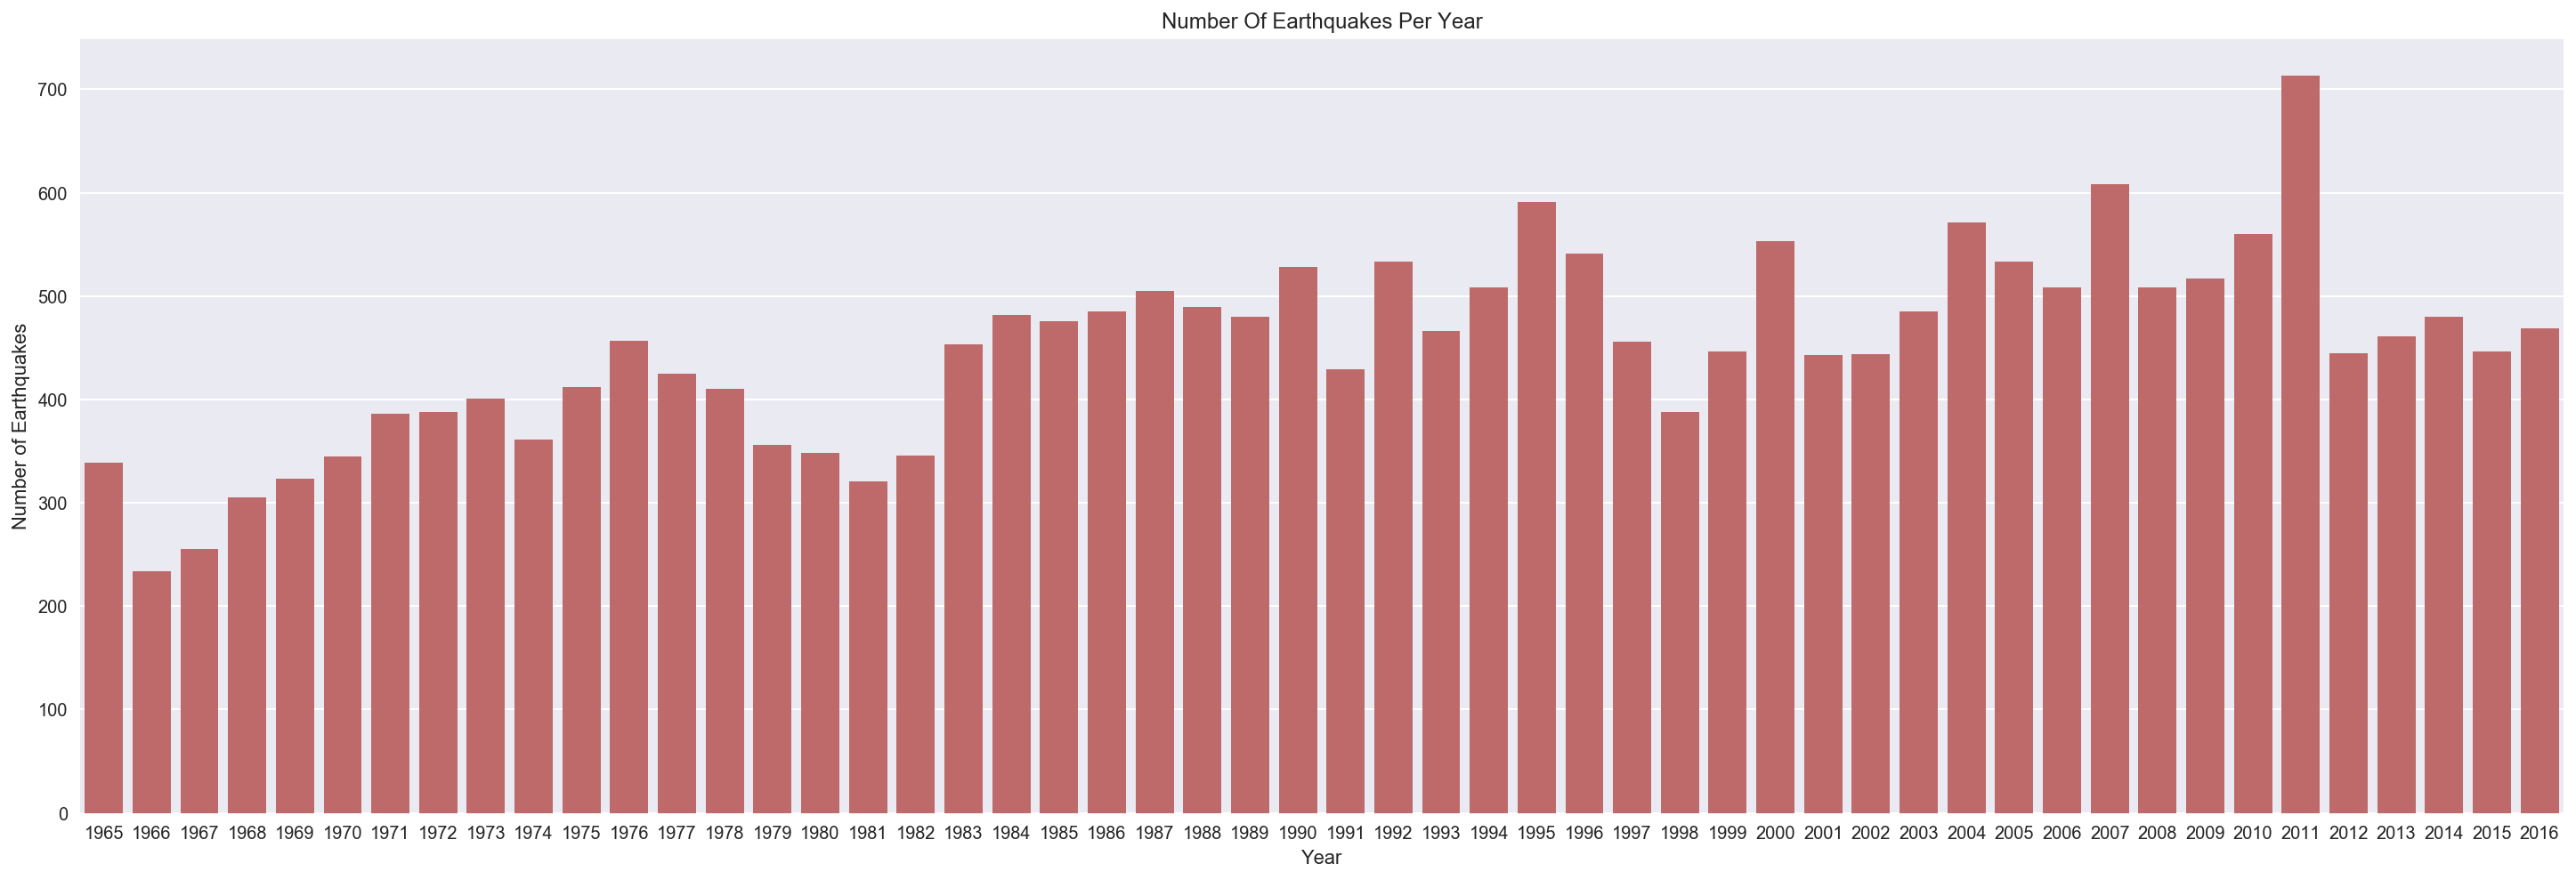

In [14]:
earthquakedata['Date'] = pd.to_datetime(earthquakedata['Date'])

earthquakedata['Year'] = earthquakedata['Date'].dt.year

plt.figure(figsize=(25,8))
sns.set(font_scale=1.0)
sns.countplot(x="Year",data=earthquakedata, color = 'indianred',)
plt.ylabel('Number of Earthquakes')
plt.xlabel('Year')
plt.title('Number Of Earthquakes Per Year')

The plot as shown above shows on the whole that the general trend is that as the years progress (to present), that the number of earthquakes that occur per year seems to increase. With the highest value occuring in 2011 and the lowest in 1966. Further visualisations of the data will now be made within the parts below:

__**Part 1 - Visualisation of global locations of earthquakes and relative magnitudes**__

This part of the script shows the different visualisation methods used to assess the global locations of the earthquakes and the relative magnitudes of each. Results as shown below:

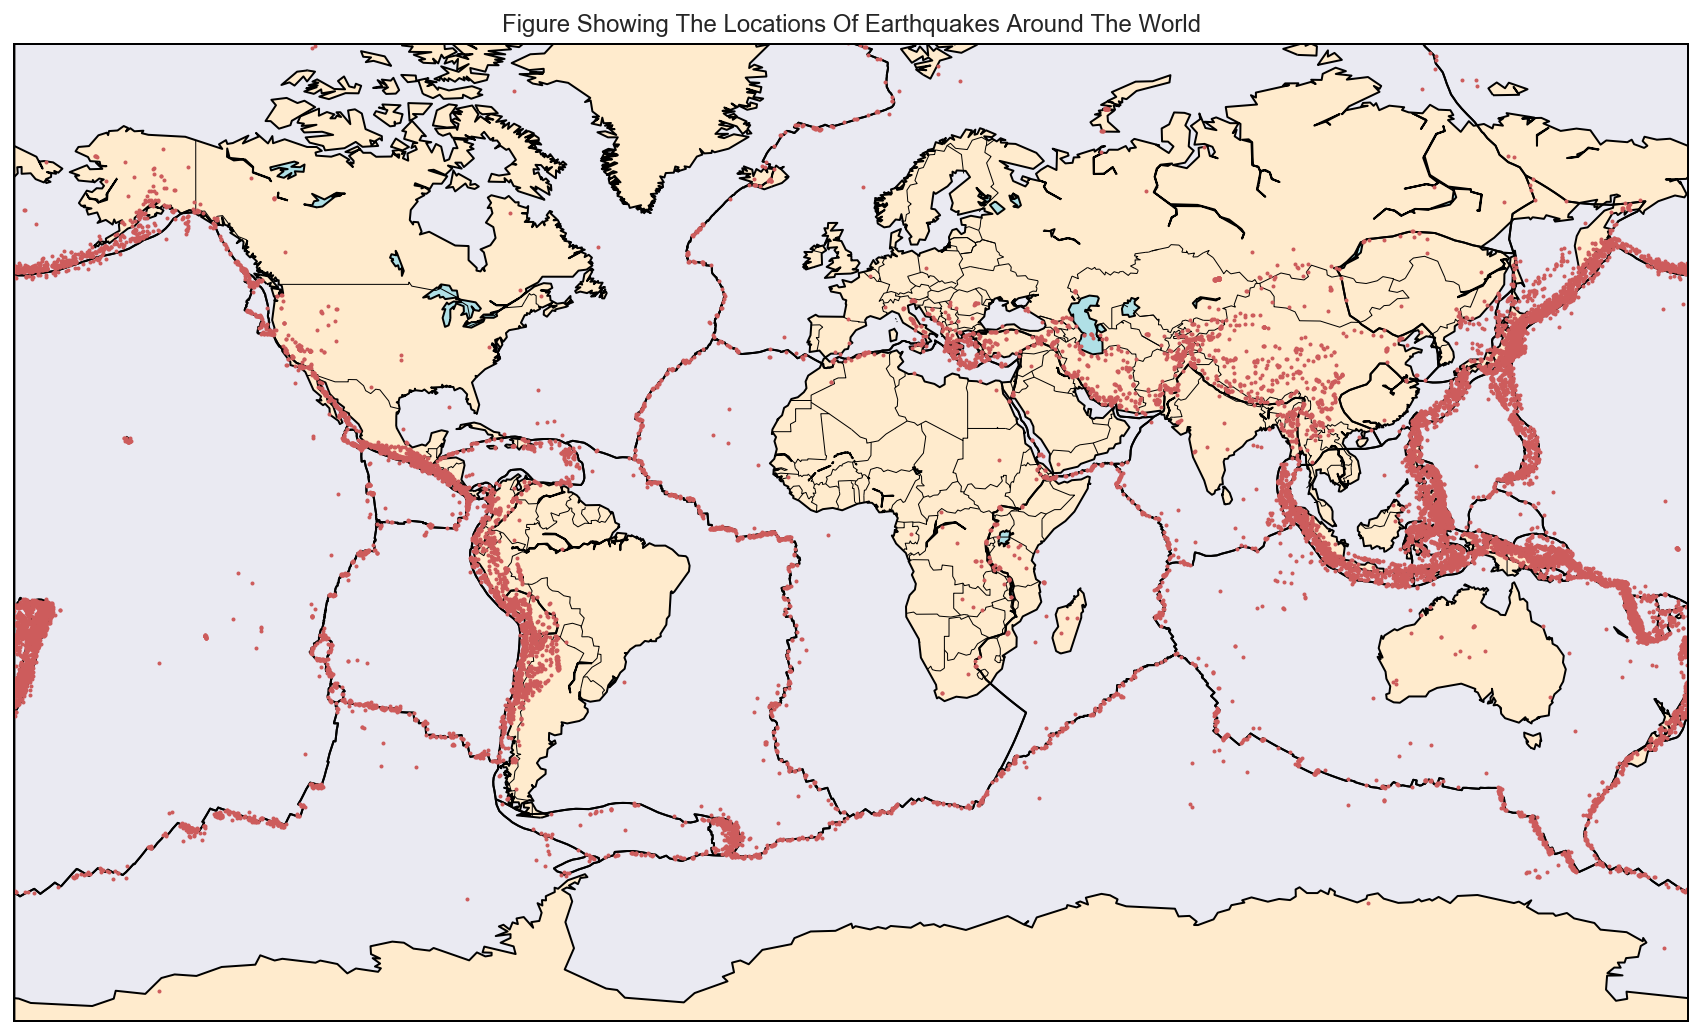

In [15]:
# This plots the locations of all of the earthquakes around the world (Using Basemap)

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = earthquakedata["Longitude"].tolist()
latitudes = earthquakedata["Latitude"].tolist()
magnitudes = earthquakedata['Magnitude'].tolist()
    
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(15,12))
plt.title("Figure Showing The Locations Of Earthquakes Around The World")
m.plot(x, y, "o", markersize = 2, color = 'indianred')
m.drawcoastlines()
m.fillcontinents(color='blanchedalmond',lake_color='powderblue')
m.drawmapboundary()
m.drawcountries()

# Adds the overlay for the tectonic plate boundaries to show proximity to fault lines.

m.readshapefile('tectonicplates-master/PB2002_plates', 
                name='tectonic_plates', drawbounds=True, color='black', linewidth = 1)

plt.show()

As the map/visualisation shows, earthquakes occur over all parts of the world and tend to follow the lines of the tectonic plate boundaries; with higher densities of earthquakes occuring at the fault lines which are to be expected. To further improve on this visualisation we could further add a filter which would only display earthquakes of a certain magnitude or even to display different colours for different ranges of magnitude; results of which can be shown below.

In [16]:
# This creates a new variable for earthquakes of a high magnitude and plots their locations to show highly affected areas

highmag = earthquakedata[earthquakedata['Magnitude']>=7]

print('Number Of Earthquakes With A Magnitude Greater Than Or Equal To 7:',highmag.Magnitude.count())

Number Of Earthquakes With A Magnitude Greater Than Or Equal To 7: 738


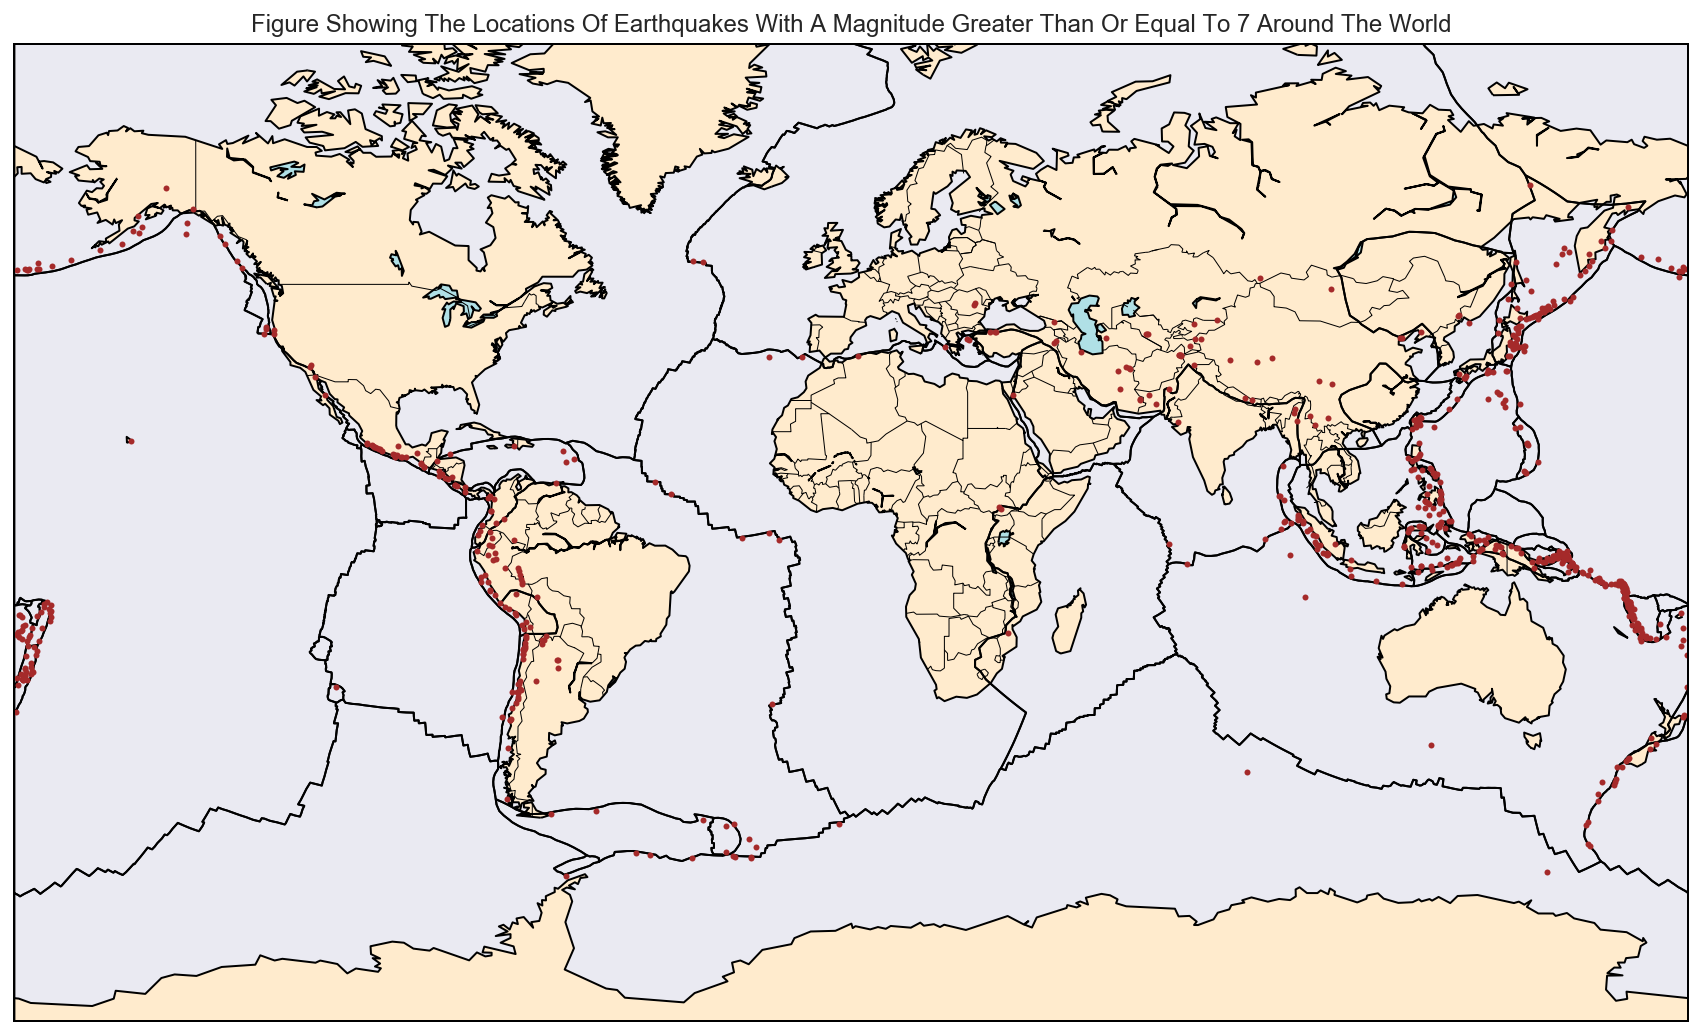

In [17]:
# This plots the locations of all of the earthquakes with a magnitude >=7 around the world (Using Basemap)

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = highmag["Longitude"].tolist()
latitudes = highmag["Latitude"].tolist()
    
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(15,12))
plt.title("Figure Showing The Locations Of Earthquakes With A Magnitude Greater Than Or Equal To 7 Around The World")
m.plot(x, y,"o", markersize = 3, color = 'brown')
m.drawcoastlines()
m.fillcontinents(color='blanchedalmond',lake_color='powderblue')
m.drawmapboundary()
m.drawcountries()
plt.legend()

# Adds the overlay for the tectonic plate boundaries to show proximity to fault lines.

m.readshapefile('tectonicplates-master/PB2002_plates', 
                name='tectonic_plates', drawbounds=True, color='black', linewidth = 1)

plt.show()

As the map/visualisation shows, there are significantly less earthquakes that occur with a magnitude of greater than or equal to 7. With majority of these values occuring within the Eastasia and Oceania regions. However this is a useful plot as these positions can potentially indicate areas that have been highly affected by earthquakes and therefore are more likely to need mitigation methods for the future. As well as this more data could also be analysed in relation to the occurance and years that these earthquakes happened and then mapped against the GDP of the nations that these occured in, in order to see the effects of the earthquakes in relation to the cities/countrys and then use this to assign risk factors associated with each earthquake. 

Another useful analysis of the dataset is to see where the earthquakes occured around the world. We can do this simply by dividing the world into 3 distinct quadrants, north, equator and south, and seeing the percentage of earthquakes that occur in each quadrant. And the next technique is to find the percentage of earthquakes that occur per country. The results of which are shown below:

In [18]:
# Division of the world into 3 distinct quadrants.

def division(data):
    north = sum(data["Latitude"] >=30)
    equator = sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    south = sum(data["Latitude"]<= -30)
    
# Percentage of earthquakes in each quadrant.

    total = north+equator+south
    northperc = north/total*100
    equatorperc = equator/total*100
    southperc = south/total*100
    return north,equator,south,northperc,equatorperc,southperc


eq = division(earthquakedata)

print("There were",eq[0],"earthquakes in latitude over 30N (North),",eq[1],
      "in latitude between 30N and 30S (Equator) and",eq[2],
      "in latitude over 30S (South). In percentages this is %.2f%%"% eq[3],",",
      "%.2f%%"% eq[4],"and","%.2f%%"% eq[5],"respectively.")

There were 5323 earthquakes in latitude over 30N (North), 15022 in latitude between 30N and 30S (Equator) and 3067 in latitude over 30S (South). In percentages this is 22.74% , 64.16% and 13.10% respectively.


In looking at this output we can see that the largest amounts of earthquakes occured around the equator, with the next largest being in the North and South respectively. This is intersting as an initial analysis into the locations of the earthquakes globally, however to further analyse this we have apptempted to sorted the earthquakes by location (Country), as shown below: 

In [19]:
# Creates a column with combined Lat/Long coordinates for use within a reverse geocoder

earthquakedata['Coordinates'] = list(zip(earthquakedata.Latitude, earthquakedata.Longitude))
                                 
earthquakedata.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Coordinates
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(19.246, 145.616)"
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(1.863, 127.352)"
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(-20.579, -173.972)"
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(-59.076, -23.557)"
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(11.938, 126.427)"
5,1965-01-10,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(-13.405, 166.629)"
6,1965-01-12,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(27.357, 87.867)"
7,1965-01-15,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(-13.309, 166.212)"
8,1965-01-16,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,1965,"(-56.452, -27.043)"
9,1965-01-17,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,"(-24.563, 178.487)"


In [20]:
# This implements a reverse geocoder on the latitude/longitude coordinates for the dataset, such that the locations and country names can be obtained

import reverse_geocoder as rg
coordinates = list(zip(earthquakedata.Latitude, earthquakedata.Longitude))
earthquakedata['Locations'] = rg.search(coordinates)

Loading formatted geocoded file...


In [21]:
# This shows what has been obtained from the reverse geocoder, we want to extract the 'cc' County Code column

rg.search(coordinates)

[OrderedDict([('lat', '15.21233'),
              ('lon', '145.7545'),
              ('name', 'Saipan'),
              ('admin1', 'Saipan'),
              ('admin2', ''),
              ('cc', 'MP')]),
 OrderedDict([('lat', '1.49305'),
              ('lon', '127.55149'),
              ('name', 'Tongutisungi'),
              ('admin1', 'Maluku Utara'),
              ('admin2', ''),
              ('cc', 'ID')]),
 OrderedDict([('lat', '-19.81468'),
              ('lon', '-174.35423'),
              ('name', 'Pangai'),
              ('admin1', 'Ha`apai'),
              ('admin2', ''),
              ('cc', 'TO')]),
 OrderedDict([('lat', '-54.28111'),
              ('lon', '-36.5092'),
              ('name', 'Grytviken'),
              ('admin1', ''),
              ('admin2', ''),
              ('cc', 'GS')]),
 OrderedDict([('lat', '12.062'),
              ('lon', '125.4881'),
              ('name', 'Dapdap'),
              ('admin1', 'Eastern Visayas'),
              ('admin2', 'Province of E

In [22]:
earthquakedata.Locations

0        {'lat': '15.21233', 'lon': '145.7545', 'name':...
1        {'lat': '1.49305', 'lon': '127.55149', 'name':...
2        {'lat': '-19.81468', 'lon': '-174.35423', 'nam...
3        {'lat': '-54.28111', 'lon': '-36.5092', 'name'...
4        {'lat': '12.062', 'lon': '125.4881', 'name': '...
5        {'lat': '-13.88333', 'lon': '167.55', 'name': ...
6        {'lat': '27.13082', 'lon': '88.23972', 'name':...
7        {'lat': '-13.88333', 'lon': '167.55', 'name': ...
8        {'lat': '-54.28111', 'lon': '-36.5092', 'name'...
9        {'lat': '-18.14161', 'lon': '178.44149', 'name...
10       {'lat': '-6.8748', 'lon': '108.9559', 'name': ...
11       {'lat': '-2.05853', 'lon': '125.97786', 'name'...
12       {'lat': '56.22778', 'lon': '162.47778', 'name'...
13       {'lat': '-21.13938', 'lon': '-175.2018', 'name...
14       {'lat': '38.17023', 'lon': '73.96674', 'name':...
15       {'lat': '-43.16337', 'lon': '146.92549', 'name...
16       {'lat': '63.06101', 'lon': '179.35046', 'name'.

In extracting the data using the reverse geocoding we can see that we have the necessary location data, such as 'cc' country code and also more detailed location data. However, I attemped to extract the individual components of this and put them into seperate columns as to then create a detailed profile of the amount of earthquakes that occured per country. This was however unsuccessful and I was unable to find a method to do this within the given time frame for this practical, but futher analysis will be undertaken to get this to work for the final leaflet/submission. 

__**Part 2 - Visualisation Of Earthquakes In Relation To Time**__

In this part we will visualise the earthquake dataset in relation to time, in particular we will look at the number of earthquakes/occurances over time and see if the general trend is that of an increase, decrease or random over time; this will also include looking at the occurances globally over each month of a year and whether there is a particular time that more earthquakes occur. 

In [23]:
# Converts and extracts the month from the 'Date' column and adds this to a new column 'Month'

earthquakedata['Date'] = pd.to_datetime(earthquakedata['Date'])

earthquakedata['Month'] = earthquakedata['Date'].dt.month

In [24]:
# Calculates the monthly occurrence of earthquakes 

monthlyoccurrence = earthquakedata.groupby("Month").groups
print(len(monthlyoccurrence[1]))

month = [i for i in range(1,13)]
occurrence = []

for i in range(len(month)):
    val = monthlyoccurrence[month[i]]
    occurrence.append(len(val))
    
# Use as a check to make sure we are getting the correct sum of earthquakes in the dataset
    
print(occurrence)
print(sum(occurrence))

1891
[1891, 1829, 2114, 1971, 1964, 1824, 1880, 2014, 1985, 1952, 1987, 2001]
23412


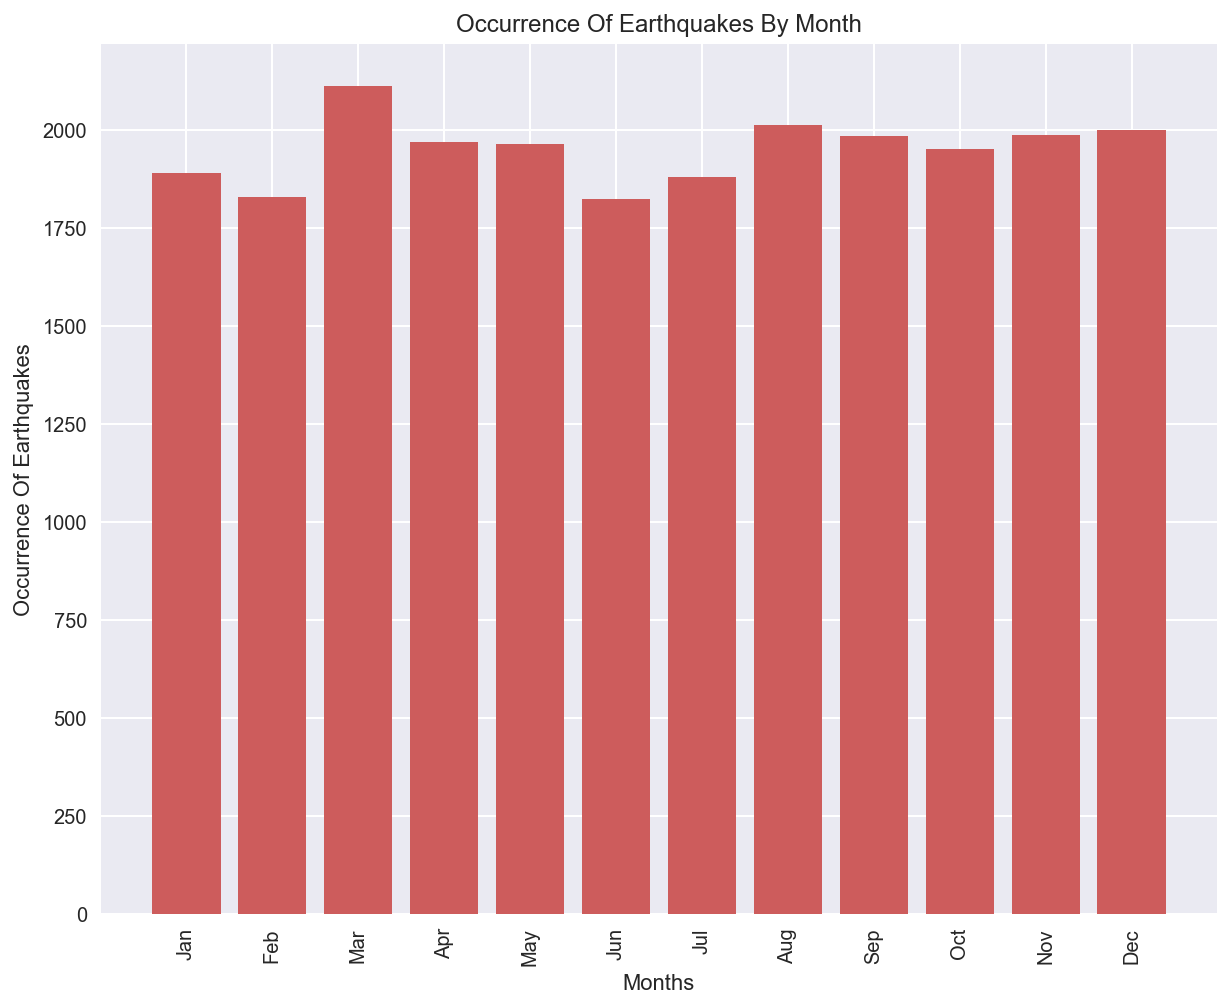

In [25]:
# Graphically visualises the occurance of earthquakes by month

fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12) + 1

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
num_cols = months
bar_heights = occurrence
ax.bar(bar_positions,bar_heights, color = 'indianred')
tick_positions = np.arange(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
plt.title("Occurrence Of Earthquakes By Month")
plt.xlabel("Months")
plt.ylabel("Occurrence Of Earthquakes")
plt.show()

This bar chart is useful in showing the visualisation of earthquake occurrence per month, as you can see from the visual the month appears to play no role in the occurrence of earthquakes as there is almost no correlation; which we would expect as they are a random/natural occurrence.

In [26]:
# Converts and extracts the year from the 'Date' column 

earthquakedata['Year'] = earthquakedata['Date'].dt.year

In [27]:
# This calculates the occurrence of earthquakes by year 

yearlyoccurrence = earthquakedata.groupby("Year").groups

print('Range Of Years For Earthquake Occurrence:', earthquakedata.Year.values)

year = [i for i in range(1965,2017)]
occurrence = []

for i in range(len(year)):
    val = yearlyoccurrence[year[i]]
    occurrence.append(len(val))

# This returns the values for the max, min and average occurrence of earthquakes per year

print("Minimum:",np.min(occurrence))
print("Maximum:",np.max(occurrence))
print('Average:',np.mean(occurrence))

Range Of Years For Earthquake Occurrence: [1965 1965 1965 ..., 2016 2016 2016]
Minimum: 234
Maximum: 713
Average: 450.230769231


From this simple analysis we can see the max, min and average amounts of earthquakes that occur per year, however it does not provide us with more detailed data as to which years these occured as well as the general trend over time. To do this we have created some plots below:

In [28]:
from scipy import stats

iqr = stats.iqr(occurrence)
upper = np.mean(occurrence) + iqr/2
lower = np.mean(occurrence) - iqr/2

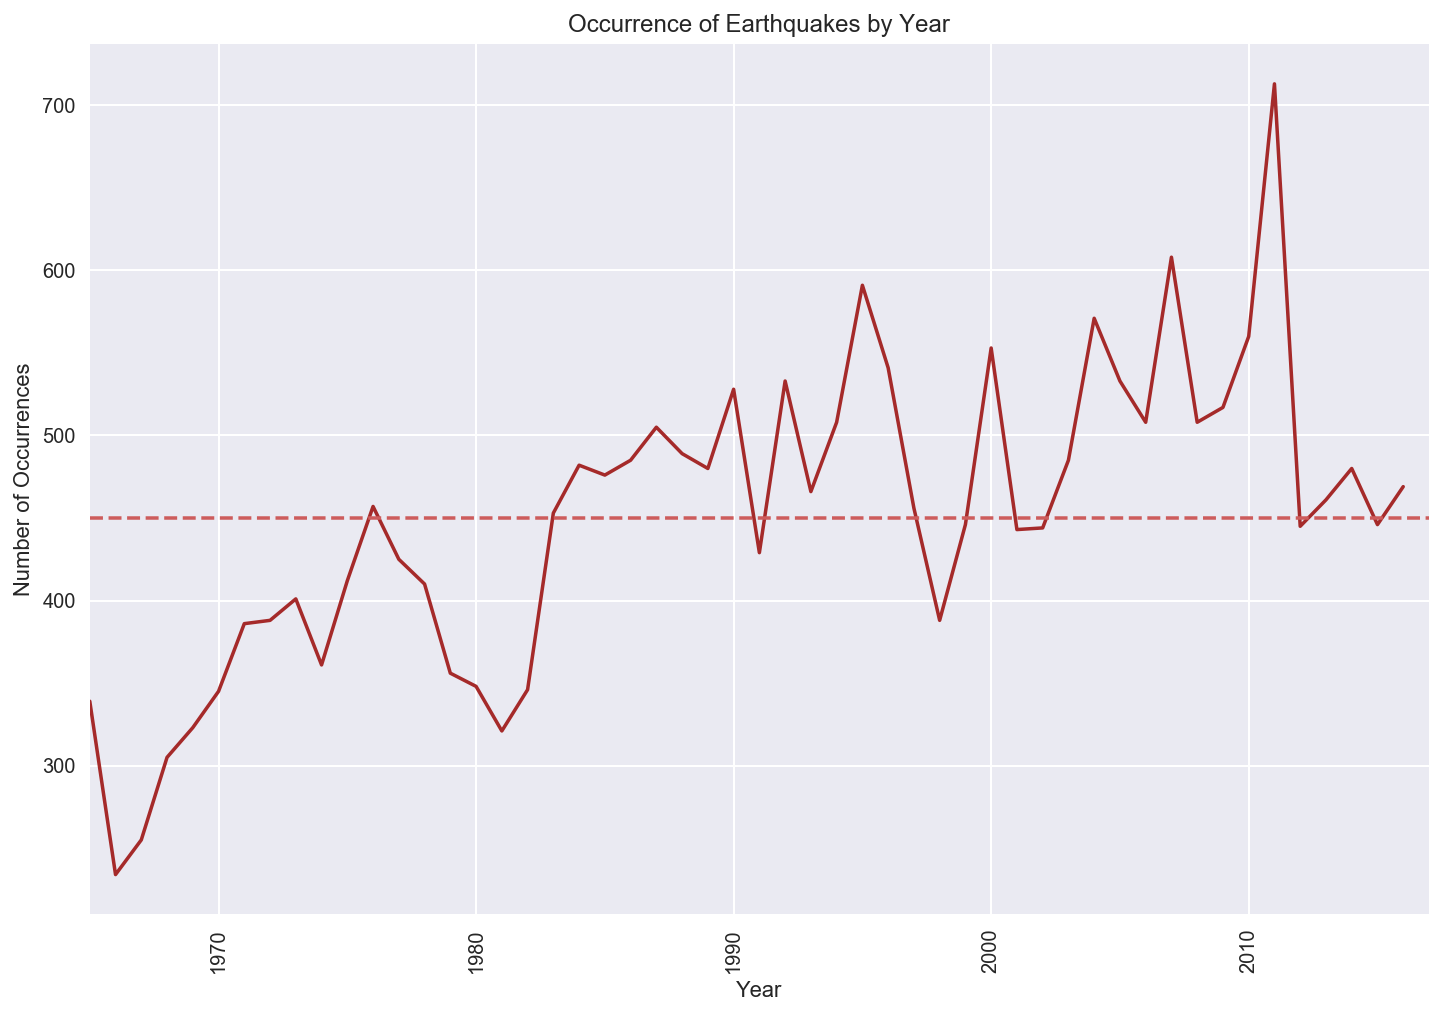

In [29]:
# Plots the occurance of earthquakes per year

fig = plt.figure(figsize=(12,8))
plt.plot(year,occurrence,'brown')
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.title("Occurrence of Earthquakes by Year")
plt.xlim(1965,2017)

# Plots a horizontal line with the average occurence of earthquakes yearly

plt.axhline(y=np.mean(occurrence),color='indianred', linestyle='--')

plt.show()

This graph/visual is a good method to display the information for the occurrence of earthquakes over time. However with that being said the graphic is static and offers no display of values for the occurrence of each year, but it does allow the oppertunity to add a line showing the average occurrence of earthquakes globally which allows a direct comparison to be made for each year against the average; with further lines that could be added to display the iqr and the upper and lower limits. 

In [30]:
# Draws an interactive scattergraph to show the global occurance of earthquakes with time 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace0 = go.Scatter(
    x = year, 
    y = occurrence,
    name='Occurrence Of Earthquakes',
    line=dict(
        color='brown',
    )
)

data = [trace0]

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Occurrence Of Earthquakes'),
    title='Global Occurrence Of Earthquakes Over Time',
    showlegend = True)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

This graph/visual is a good method to display the information for the occurrence of earthquakes over time. As the interactive plot allows the oppertunity to display the values for the occurrence of earthquakes each year, however it does not show the line of average occurrence allowing a direct comparison each year against the average; this plot does however have further improvements that could be made, with the addition of further lines such as the average, iqr and upper/lower limits. 

__**Part 3 - Locations Of Highest Risk In Relation To Earthquakes**__

This section makes use of an additional dataset, https://www.kaggle.com/max-mind/world-cities-database/data - world cities database. The reason this database has been chosen in conjunction with the eartquake dataset is due to its value in visualising and analysisng the locations of 'high risk' cities in relation to earthquakes. The visualisations and analysis undertaken within this section can be seen below: 

In [31]:
# Imports the data for global major cities 

majorcities = pd.read_csv("worldcitiespop.csv")

In [32]:
majorcities

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333
5,ad,andorra,Andorra,7,NaN,42.500000,1.516667
6,ad,andorra la vella,Andorra la Vella,7,20430.0,42.500000,1.516667
7,ad,andorra-vieille,Andorra-Vieille,7,NaN,42.500000,1.516667
8,ad,andorre,Andorre,7,NaN,42.500000,1.516667
9,ad,andorre-la-vieille,Andorre-la-Vieille,7,NaN,42.500000,1.516667


In exporting this database we can see that it contains values of population along with the relevant latitudes and longitudes for each location (city). Therefore we have taken the hypothesis that only highly populated cities (greater than 500,000) should be plotted so that they can be assesed in relation to the locations of high magnitude earthquakes; therefore it should give us an indication to areas most at risk of earthquakes based upon damage and risk to the population.

In [33]:
# Creates a new variable of the highly populated cities within the database

highpop = majorcities[majorcities['Population']>=500000]

# Returns the number of cities that are considered highly populated 

print('Number Of Cities With A Population Greater Than Or Equal To 500000:',highpop.Population.count())

Number Of Cities With A Population Greater Than Or Equal To 500000: 620


In doing the basis analysis of the amount of cities that are considered to be highly populated, we can see that there are 620 within this range. This therefore shows there is a large number of cities at risk from the effects of natural hazzards (earthquakes), and so we will then conduct a plot to see the locations of the high risk earthquakes in relation to the highly populated cities, as shown below:  

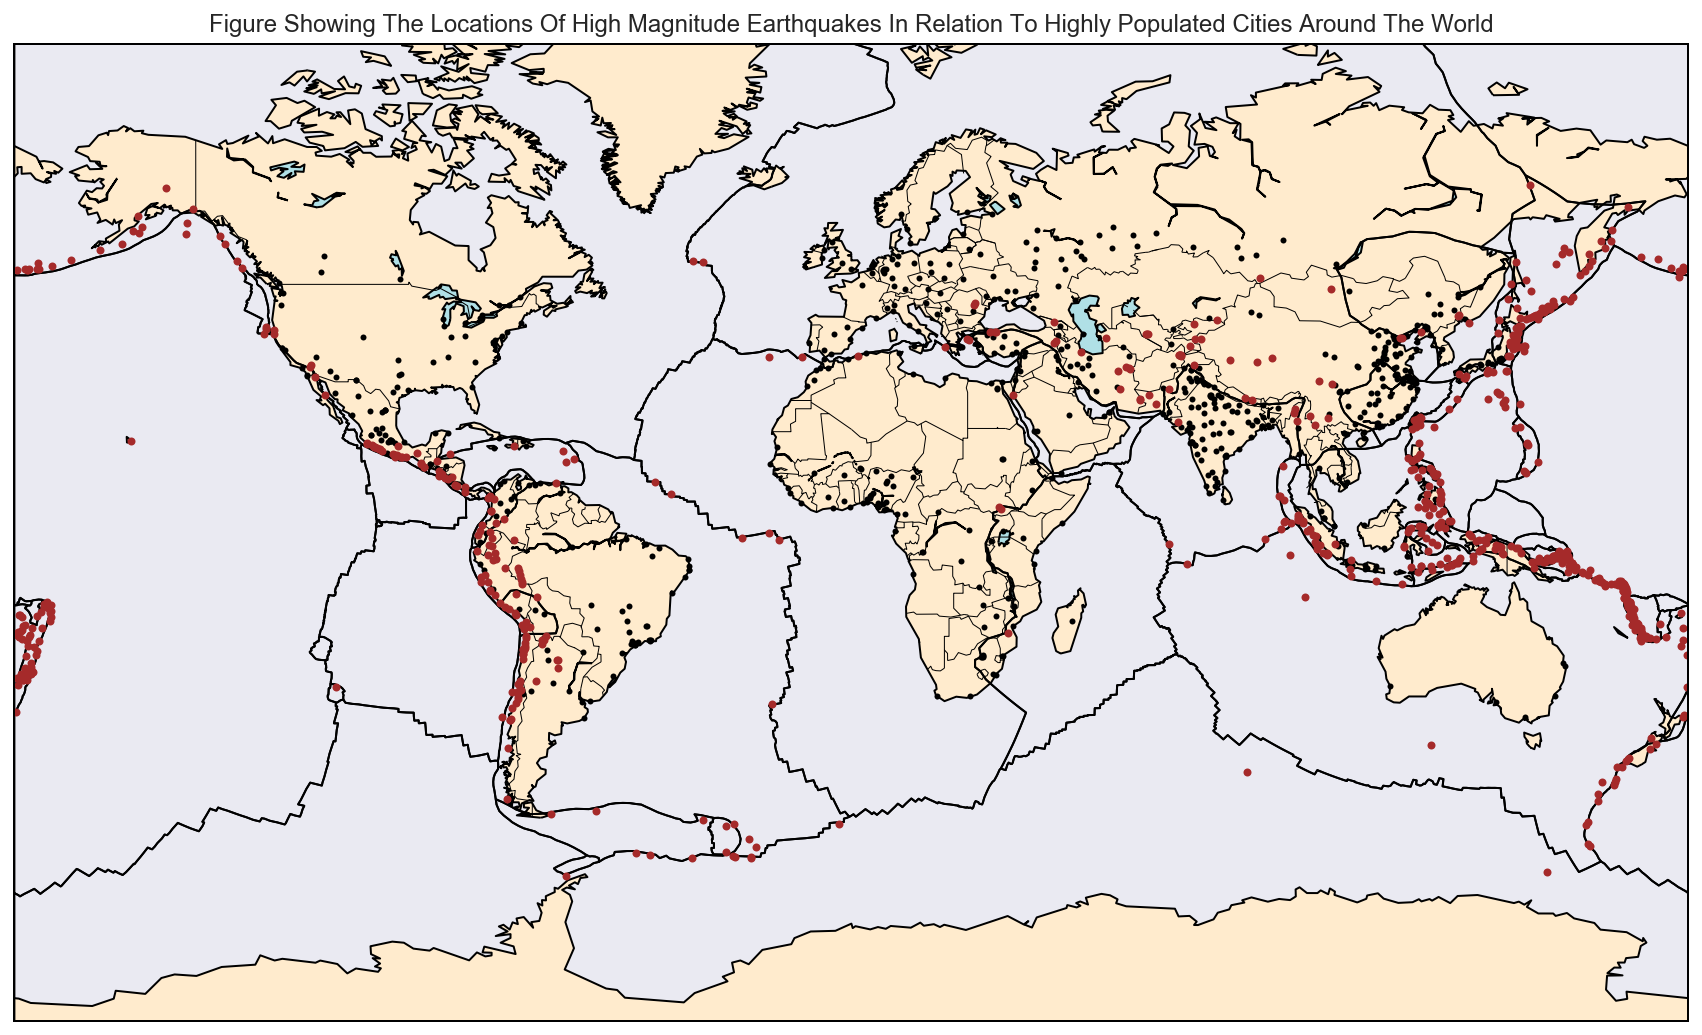

In [34]:
# This plots the locations of all of the earthquakes with a magnitude >=7 around the world against highly populated cities (Using Basemap)

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes1 = highpop["Longitude"].tolist()
latitudes1 = highpop["Latitude"].tolist()
    
x,y = m(longitudes1,latitudes1)

longitudes = highmag["Longitude"].tolist()
latitudes = highmag["Latitude"].tolist()
    
a,b = m(longitudes,latitudes)

fig = plt.figure(figsize=(15,12))
plt.title("Figure Showing The Locations Of High Magnitude Earthquakes In Relation To Highly Populated Cities Around The World")
m.plot(x, y, "o", markersize = 3, color = 'black')
m.plot(a, b, "o", markersize = 4, color = 'brown')
m.drawcoastlines()
m.fillcontinents(color='blanchedalmond',lake_color='powderblue')
m.drawmapboundary()
m.drawcountries()
plt.legend()

# Adds the overlay for the tectonic plate boundaries to show proximity to fault lines.

m.readshapefile('tectonicplates-master/PB2002_plates', 
                name='tectonic_plates', drawbounds=True, color='black', linewidth = 1)

plt.show()

The plot as shown above indicates the positions of the highly populated cities in black and the earthquakes of high magnitude in brown. As can be seen from the plot, it appears that a large proportion of the earthquakes seem to be at a good distance from the majorly populated cities, and hence would suggest that they are less likely to be at a risk  accoarding to current data. With this being said, we can however see that some earthquakes are extremely close to majorly populated cities. This information however is a very useful tool, as it allows us to make predictions on areas/cities to focus resources and mitigation strategies on for the future in order to minimise damage and loss of life. In analysisng this further I would invision that an algorithm could be written such that the nearest city (nearest neighbour algorithm) could be performed on each of the earthquake locations such that the nearest highly populated city to them could be recorded, and hence the cities with the most earthquakes in close proximity would be considered at the highest risk. Within this coursework however there is not enough time to analyse the finidings further in this way, and so a simplistic approach has been taken below, in which the world has been divided into 3 distinct regions, North, Equator and South, such that the relative earthquakes can be mapped in relation to the amount of cities within each of these regions and then a simplistic model can be generated in terms of relative risk, as outlined below:  

In [35]:
# Division of the world into 3 distinct quadrants.

def division1(data):
    left1 = sum(data["Latitude"] >=30)
    middle1 = sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    right1 = sum(data["Latitude"]<=-30)
    
# Percentage of earthquakes in each quadrant.

    total1 = left1+middle1+right1
    leftperc1 = left1/total1*100
    middleperc1 = middle1/total1*100
    rightperc1 = right1/total1*100
    return left1,middle1,right1,leftperc1,middleperc1,rightperc1


eq1 = division1(earthquakedata)

print("There were",eq1[0],"earthquakes in Longitude over 30N (North),",eq1[1],
      "in Longitude between 30N and 30S (Equator) and",eq1[2],
      "in Longitude over 30S (South). In percentages this is %.2f%%"% eq1[3],",",
      "%.2f%%"% eq1[4],"and","%.2f%%"% eq1[5],"respectively.")

There were 5323 earthquakes in Longitude over 30N (North), 15022 in Longitude between 30N and 30S (Equator) and 3067 in Longitude over 30S (South). In percentages this is 22.74% , 64.16% and 13.10% respectively.


In [36]:
# Division of the major cities into 3 distinct quadrants.

def division2(data):
    left = sum(data["Latitude"] >=30)
    middle = sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    right = sum(data["Latitude"]<=-30)
    
# Percentage of cities in each quadrant.

    total = left+middle+right
    leftperc = left/total*100
    middleperc = middle/total*100
    rightperc = right/total*100
    return left,middle,right,leftperc,middleperc,rightperc


eq2 = division2(majorcities)

print("There were",eq2[0],"Major Cities in Longitude over 30N (North),",eq2[1],
      "in Longitude between 30N and 30S (Equator) and",eq2[2],
      "in Longitude over 30S (South). In percentages this is %.2f%%"% eq2[3],",",
      "%.2f%%"% eq2[4],"and","%.2f%%"% eq2[5],"respectively.")

There were 1748103 Major Cities in Longitude over 30N (North), 1398662 in Longitude between 30N and 30S (Equator) and 27193 in Longitude over 30S (South). In percentages this is 55.08% , 44.07% and 0.86% respectively.


As we can see from the two analysis of both the divisions for the global locations of earthquakes and major cities, the general trend suggests that the greatest affected areas/areas at the highest risk at that within the 'Equatorial region', this being the area with the highest earthquake occurances as well as being one of the highest quadrants for major cities. Although this is a good observation to create initial hypothesis for the risks to countries/cities, it does however lack some further validation, such as the GDP or wealth of the countries being plotted; as this would give an even greater indication to the relative risk in relation to earthquakes and would therefore help in the prediciton and mitigation for the future. Other further analysis such as this are outlined in the summary/conclusion as below: 

__**Summary/Conclusion**__

As a quick check to conclude, a correlation test has been undertaken (as shown below) so that the variables can be plotted in relation to magnitudes of earthqukes; in order to assess that the realtive variables have been tested correctly through this coursework and see if there are any gaps that have not been considered and that can then be made clear and taken forward for further analysis.

In [37]:
# Numerical breakdown of correlation of Magnitude against all of the variables

earthquakedata.corr()['Magnitude']

Latitude                      0.034987
Longitude                     0.038579
Depth                         0.023457
Depth Error                  -0.135880
Depth Seismic Stations        0.440582
Magnitude                     1.000000
Magnitude Error               0.135573
Magnitude Seismic Stations   -0.003972
Azimuthal Gap                -0.233579
Horizontal Distance          -0.092609
Horizontal Error             -0.078406
Root Mean Square              0.075865
Year                         -0.032015
Month                         0.001175
Name: Magnitude, dtype: float64

This shows that the physical variables which effect the magnitude of the earthquakes the most seems to be, location (logitude/latitude) and the Depth. This shows that we were correct to carry out detailed analysis based upon locations and then carry that further into temporal analysis. An interesting point that can be taken from this however is the effects on depth as a predictor for magnitude of earthquakes, and is something to be considered for future analysis.   

In summary this script shows some of the various visualisation techniques that can used within this particular dataset to show the general trends within the earthquake data. The different parts within this code show the steps taken to analyse the data in a logical sense to try and evidence our inital hypothesis. However, as mentioned there are some further explorations that could be made within this particular dataset if given more time and these are as follows:

- Further exploration into the reverse geocoding tool, especially in relation to the extraction of the country codes so that locations can be mapped/categorised in this way and then used further to predict risk levels based on countries.

- Further explorations also include the use of a nearest neighbour algorithm to detect the nearest cities to the highest magnitude earthqukes such that cities and countries with the highest risk of sizeable earthquakes can be identified and general trends observed to see if there is any correlations.

- Further analysis should also include the use of depth as an indicator and predictor to the magnitude of earthquakes, especially to see whether this is effected more greatly at higher or lower magnitude earthquakes, and assessing this in relation to time see whether we can start to construct a model that could predict the size of an upcoming earthquake based purely on the size and depth of the one before it.


The steps outlined above show some of the potentials for further development and some of which will be taken forward within the final submission/leaflet.
